# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
import csv
import re
from collections import defaultdict

# Defining the Function to tokenize text into words
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

# Defining the Function to generate N-grams from a list of tokens
def generate_ngrams(tokens, n):
    ngrams = []
    for i in range(len(tokens) - n + 1):
        ngrams.append(tuple(tokens[i:i+n]))
    return ngrams

# Defining the Function to calculate frequencies of N-grams
def count_ngrams(tokens, n):
    ngram_counts = defaultdict(int)
    for i in range(len(tokens) - n + 1):
        ngram = tuple(tokens[i:i+n])
        ngram_counts[ngram] += 1
    return ngram_counts

# Defining the Function to calculate probabilities of bigrams
def calculate_bigram_probabilities(tokens):
    bigram_counts = count_ngrams(tokens, 2)
    unigram_counts = count_ngrams(tokens, 1)
    bigram_probabilities = {}
    for bigram, count in bigram_counts.items():
        w1, w2 = bigram
        bigram_probabilities[bigram] = count / unigram_counts[(w1,)]
    return bigram_probabilities

# Defining the Function to extract noun phrases using POS tagging
def extract_noun_phrases(text):

    tokens = tokenize(text)
    pos_tags = ["NOUN"] * len(tokens)
    noun_phrases = []
    current_phrase = []
    for token, pos_tag in zip(tokens, pos_tags):
        if pos_tag == "NOUN":
            current_phrase.append(token)
        else:
            if current_phrase:
                noun_phrases.append(" ".join(current_phrase))
                current_phrase = []
    if current_phrase:
        noun_phrases.append(" ".join(current_phrase))
    return noun_phrases

# Loading the  dataset
def load_dataset(filename):
    dataset = []
    with open(filename, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        for row in reader:
            dataset.append(row[0])  # Assuming each row contains a single text
    return dataset

# Main function to perform N-gram analysis
def main():
    dataset = load_dataset('/content/movie_reviews.csv')  # Replace with your dataset filename

    # 1: Count the frequency of all the N-grams (N=3)
    ngram_counts = defaultdict(int)
    for text in dataset:
        tokens = tokenize(text)
        ngram_counts.update(count_ngrams(tokens, 3))

    # 2: Calculate probabilities for all the bigrams
    bigram_probabilities = {}
    for text in dataset:
        tokens = tokenize(text)
        bigram_probabilities.update(calculate_bigram_probabilities(tokens))

    # 3: Extract noun phrases and calculate relative probabilities
    noun_phrase_frequencies = defaultdict(int)
    for text in dataset:
        noun_phrases = extract_noun_phrases(text)
        for phrase in noun_phrases:
            noun_phrase_frequencies[phrase] += 1

    max_frequency = max(noun_phrase_frequencies.values())
    relative_probabilities = {}
    for text_index, text in enumerate(dataset, start=1):
        relative_probabilities[text_index] = {}
        for phrase, frequency in noun_phrase_frequencies.items():
            relative_probabilities[text_index][phrase] = frequency / max_frequency

    # Print relative probabilities in a table format
    print("Text Index\tNoun Phrase\tRelative Probability")
    for text_index, probabilities in relative_probabilities.items():
        for phrase, probability in probabilities.items():
            print(f"{text_index}\t\t{phrase}\t\t{probability}")

if __name__ == "__main__":
    main()


Text Index	Noun Phrase	Relative Probability
1		movie name		0.001
1		guardians of the galaxy vol 3 2023 imdb		1.0
2		movie name		0.001
2		guardians of the galaxy vol 3 2023 imdb		1.0
3		movie name		0.001
3		guardians of the galaxy vol 3 2023 imdb		1.0
4		movie name		0.001
4		guardians of the galaxy vol 3 2023 imdb		1.0
5		movie name		0.001
5		guardians of the galaxy vol 3 2023 imdb		1.0
6		movie name		0.001
6		guardians of the galaxy vol 3 2023 imdb		1.0
7		movie name		0.001
7		guardians of the galaxy vol 3 2023 imdb		1.0
8		movie name		0.001
8		guardians of the galaxy vol 3 2023 imdb		1.0
9		movie name		0.001
9		guardians of the galaxy vol 3 2023 imdb		1.0
10		movie name		0.001
10		guardians of the galaxy vol 3 2023 imdb		1.0
11		movie name		0.001
11		guardians of the galaxy vol 3 2023 imdb		1.0
12		movie name		0.001
12		guardians of the galaxy vol 3 2023 imdb		1.0
13		movie name		0.001
13		guardians of the galaxy vol 3 2023 imdb		1.0
14		movie name		0.001
14		guardians of the galaxy v

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [12]:
import math

# Function to calculate cosine similarity between two vectors
def cosine_similarity(vector1, vector2):
    dot_product = sum([vector1[i] * vector2[i] for i in range(len(vector1))])
    magnitude1 = math.sqrt(sum([val**2 for val in vector1]))
    magnitude2 = math.sqrt(sum([val**2 for val in vector2]))

    if magnitude1 == 0 or magnitude2 == 0:
        return 0  # to avoid division by zero

    return dot_product / (magnitude1 * magnitude2)

# Function to compute TF-IDF matrix
def compute_tfidf_matrix(docs):
    unique_words = list(set([word for doc in docs for word in doc]))
    word_to_index = {word: i for i, word in enumerate(unique_words)}
    num_docs = len(docs)

    tf_matrix = []
    for doc in docs:
        tf_vector = [doc.count(word) for word in unique_words]
        tf_matrix.append(tf_vector)

    idf_vector = []
    for word in unique_words:
        doc_count = sum([1 for doc in docs if word in doc])
        idf_vector.append(math.log(num_docs / doc_count) if doc_count != 0 else 0)

    tfidf_matrix = []
    for tf_vector in tf_matrix:
        tfidf_vector = [tf_vector[i] * idf_vector[i] for i in range(len(tf_vector))]
        tfidf_matrix.append(tfidf_vector)

    return tfidf_matrix, word_to_index

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    return lemmatized_tokens

# Preprocess the documents
cleaned_reviews = reviews_df['Cleaned Review'].tolist()
preprocessed_reviews = [preprocess_text(review) for review in cleaned_reviews]

# Preprocess the queries
preprocessed_queries = [preprocess_text(query) for query in queries]

# Compute TF-IDF matrix
tfidf_matrix, word_to_index = compute_tfidf_matrix(preprocessed_reviews + preprocessed_queries)

# Compute cosine similarity between queries and reviews
results = {}
for i, query in enumerate(preprocessed_queries):
    query_index = len(preprocessed_reviews) + i
    query_vector = tfidf_matrix[query_index]

    cosine_similarities = []
    for j, review in enumerate(preprocessed_reviews):
        review_vector = tfidf_matrix[j]
        similarity = cosine_similarity(query_vector, review_vector)
        cosine_similarities.append((j, similarity))

    cosine_similarities.sort(key=lambda x: x[1], reverse=True)
    results[queries[i]] = cosine_similarities[:5]

# Print the results
for query, ranked_docs in results.items():
    print(f"Query: {query}")
    for rank, (doc_index, cosine_sim) in enumerate(ranked_docs, start=1):
        print(f"{rank}. Document index: {doc_index}, Cosine Similarity: {cosine_sim:.3f}")
    print()


Query: Best Marvel movie since Endgame, great themes, full of heart.
1. Document index: 1, Cosine Similarity: 0.043
2. Document index: 26, Cosine Similarity: 0.043
3. Document index: 51, Cosine Similarity: 0.043
4. Document index: 76, Cosine Similarity: 0.043
5. Document index: 101, Cosine Similarity: 0.043

Query: Guardians of the Galaxy Vol. 3 feels like a breath of fresh air, a unique space adventure.
1. Document index: 1, Cosine Similarity: 0.096
2. Document index: 26, Cosine Similarity: 0.096
3. Document index: 51, Cosine Similarity: 0.096
4. Document index: 76, Cosine Similarity: 0.096
5. Document index: 101, Cosine Similarity: 0.096

Query: The film struggles with tonal inconsistencies and underdeveloped plotlines.
1. Document index: 19, Cosine Similarity: 0.014
2. Document index: 44, Cosine Similarity: 0.014
3. Document index: 69, Cosine Similarity: 0.014
4. Document index: 94, Cosine Similarity: 0.014
5. Document index: 119, Cosine Similarity: 0.014

Query: Rocket's storyline 

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


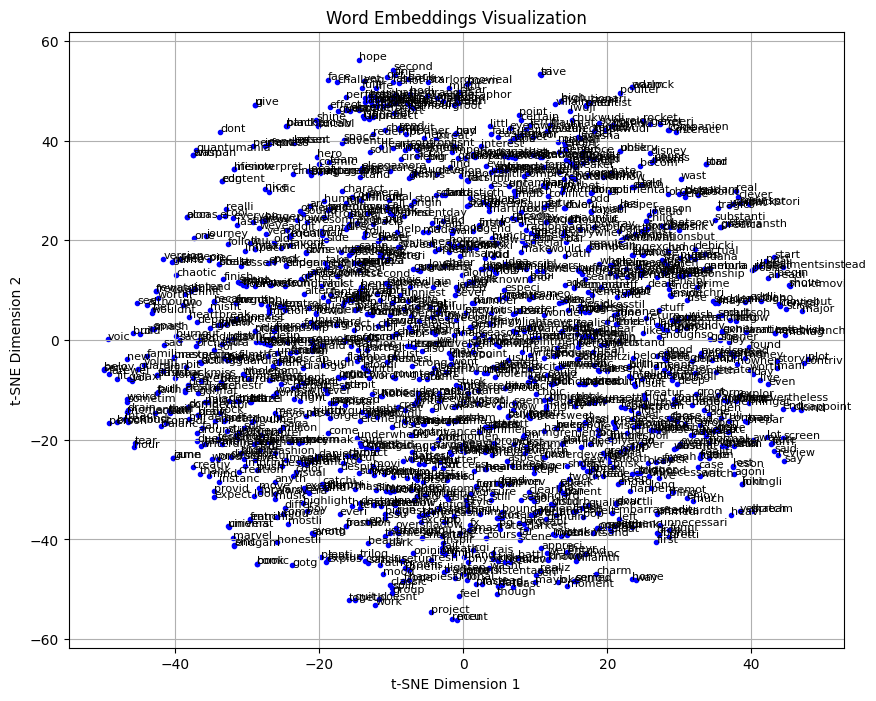

In [ ]:
!pip install gensim matplotlib
import gensim
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

nltk.download('punkt')
nltk.download('stopwords')

# Function to preprocess text
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Lowercasing
    tokens = [word.lower() for word in tokens]
    # Remove punctuation
    table = str.maketrans('', '', string.punctuation)
    stripped = [word.translate(table) for word in tokens]
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in stripped if word not in stop_words]
    return words

# Load data from CSV
def load_data_from_csv(filename, column_name):
    df = pd.read_csv(filename)
    return df[column_name].tolist()

# Load your data from CSV
filename = '/content/movie_reviews.csv'
column_name = 'Cleaned Review'
data = load_data_from_csv(filename, column_name)

# Preprocess the data
data = [preprocess_text(text) for text in data]

# Train Word2Vec model
model = Word2Vec(sentences=data, vector_size=300, window=5, min_count=1, workers=4)

# Visualize word embeddings
def visualize_embeddings(model):
    # Extract word vectors
    word_vectors = model.wv
    vocab = list(word_vectors.index_to_key)
    X = word_vectors[vocab]

    # Reduce dimensionality using t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)

    # Plot
    plt.figure(figsize=(10, 8))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], marker='.', color='b')

    # Add annotations
    for i, word in enumerate(vocab):
        plt.annotate(word, xy=(X_tsne[i, 0], X_tsne[i, 1]), fontsize=8)

    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.title('Word Embeddings Visualization')
    plt.grid(True)
    plt.show()

# Visualize embeddings
visualize_embeddings(model)






## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link: https://github.com/Kavyakolipaka/LaxmiNagaKavya_INFO5731_Spring2024/blob/8e615d695386e0bbcf8d4bfd23ab375f79df269a/movie_reviews_sentiment_Analysis.csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [11]:

# Challenging: The preprocessing steps from scratch is a little bit time and challenging and also the creating own training and sentiment analysis for complete 1000 data reviews is bit complicated and also interesting.
# Enjoyed performing visualization and word embeddings are more interesting for all the reviews.
# Time provided to complete the assignment is sufficient and it is convinient to explore on the topics.